In [1]:
from tensorflow.keras.preprocessing.text import one_hot

2025-04-15 15:24:35.003574: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-15 15:24:35.017197: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 15:24:35.102581: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 15:24:35.211715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-15 15:24:35.341392: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
### sentences
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [3]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [4]:
## Define the vocabulary size
voc_size=10000

In [5]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [6]:
### One Hot Representation

one_hot_repr = [one_hot(words, voc_size) for words in sent]

one_hot_repr


[[5506, 1210, 7393, 5071],
 [5506, 1210, 7393, 6871],
 [5506, 4494, 7393, 1754],
 [2354, 7906, 6888, 6313, 7757],
 [2354, 7906, 6888, 6313, 7667],
 [4634, 5506, 2867, 7393, 4042],
 [8666, 6287, 6266, 6313]]

In [7]:
## word Embedding Representation

from tensorflow.keras.layers import Embedding
#from tensorflow.keras.processing.sequence import pad_sequences
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential

In [8]:
import numpy as np

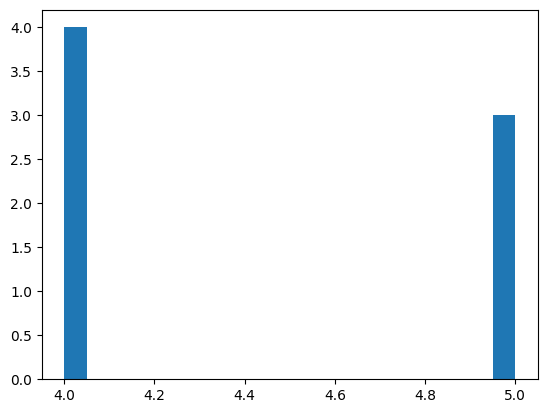

In [9]:
lengths = [len(seq) for seq in one_hot_repr]
import matplotlib.pyplot as plt
plt.hist(lengths, bins=20)
plt.show()


In [10]:
sent_length=8

##padding the encoded datas with pre '0's
embedded_docs=pad_sequences(one_hot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0 5506 1210 7393 5071]
 [   0    0    0    0 5506 1210 7393 6871]
 [   0    0    0    0 5506 4494 7393 1754]
 [   0    0    0 2354 7906 6888 6313 7757]
 [   0    0    0 2354 7906 6888 6313 7667]
 [   0    0    0 4634 5506 2867 7393 4042]
 [   0    0    0    0 8666 6287 6266 6313]]


In [11]:
## feature representation

###
# After you have your padded sequences (which are just sequences of integers), you usually pass them through an embedding layer before feeding into your RNN / LSTM / GRU models.

#The embedding layer converts each integer (word index) into a dense vector of fixed size.

#✅ So if:

#You have dim = 10

#Each word will be represented as a dense vector of size 10.
###
#
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Why do we need this?
#Instead of using sparse or one-hot vectors (which are big and inefficient), embedding layers
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#So, what does dim = 10 mean?
#It means:

#"I want to represent each word as a dense vector of length 10."

#How to choose dim?
#There’s no fixed rule, but here are some guidelines:

#Vocabulary Size	Recommended dim
#Small (~1k words)	8–32
#Medium (~10k words)	50–100
#Large (~100k words)	200–300 (like pretrained GloVe / Word2Vec models)
#For simple tasks, dim = 10 is a reasonable starting point.

#If you're just learning or experimenting, it’s fine!





dim=10

Build the model

In [12]:
#This means:

#"I am creating a simple linear stack of layers."

#In Keras, Sequential means you’ll add layers one after the other, like stacking blocks.
model=Sequential()

#"For each word index in the input sequence, map it to a learned dense vector of size dim."
model.add(Embedding(voc_size,dim,input_length=sent_length))

#Optimizer: 'adam'

#✅ Adam is a great, fast, and adaptive optimizer.

#✅ Combines benefits of AdaGrad and RMSProp.

#Loss function: 'mse' = Mean Squared Error

#This is usually used for regression tasks.

#MSE means:

#"Minimize the square of the difference between predicted and actual values."
model.compile('adam','mse')

/home/kpit/Documents/GenerativeAI/simple_rnn_imdb/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.predict(embedded_docs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


array([[[-0.01390476, -0.0338629 , -0.04227588,  0.02402918,
          0.03619638,  0.01297566,  0.02530548,  0.03629097,
          0.04304706, -0.03408343],
        [-0.01390476, -0.0338629 , -0.04227588,  0.02402918,
          0.03619638,  0.01297566,  0.02530548,  0.03629097,
          0.04304706, -0.03408343],
        [-0.01390476, -0.0338629 , -0.04227588,  0.02402918,
          0.03619638,  0.01297566,  0.02530548,  0.03629097,
          0.04304706, -0.03408343],
        [-0.01390476, -0.0338629 , -0.04227588,  0.02402918,
          0.03619638,  0.01297566,  0.02530548,  0.03629097,
          0.04304706, -0.03408343],
        [ 0.03009273, -0.02718265, -0.03851255, -0.02175012,
          0.02430664,  0.02420321, -0.01907006,  0.00114978,
          0.01193244,  0.02303514],
        [ 0.01478065, -0.02461132,  0.04039134, -0.0369468 ,
         -0.01155674,  0.04460367, -0.00843411, -0.03731682,
         -0.01569642,  0.01293914],
        [ 0.00246737, -0.01671193, -0.04374204,  0.0

In [15]:
embedded_docs[0]

array([   0,    0,    0,    0, 5506, 1210, 7393, 5071], dtype=int32)

In [17]:
import numpy as np

# assuming embedded_docs[0] is a single sequence like shape (100,)
model.predict(np.expand_dims(embedded_docs[0], axis=0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


array([[[-0.01390476, -0.0338629 , -0.04227588,  0.02402918,
          0.03619638,  0.01297566,  0.02530548,  0.03629097,
          0.04304706, -0.03408343],
        [-0.01390476, -0.0338629 , -0.04227588,  0.02402918,
          0.03619638,  0.01297566,  0.02530548,  0.03629097,
          0.04304706, -0.03408343],
        [-0.01390476, -0.0338629 , -0.04227588,  0.02402918,
          0.03619638,  0.01297566,  0.02530548,  0.03629097,
          0.04304706, -0.03408343],
        [-0.01390476, -0.0338629 , -0.04227588,  0.02402918,
          0.03619638,  0.01297566,  0.02530548,  0.03629097,
          0.04304706, -0.03408343],
        [ 0.03009273, -0.02718265, -0.03851255, -0.02175012,
          0.02430664,  0.02420321, -0.01907006,  0.00114978,
          0.01193244,  0.02303514],
        [ 0.01478065, -0.02461132,  0.04039134, -0.0369468 ,
         -0.01155674,  0.04460367, -0.00843411, -0.03731682,
         -0.01569642,  0.01293914],
        [ 0.00246737, -0.01671193, -0.04374204,  0.0